In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\adity\PycharmProjects\mlprojects\notebook\data\raw.csv")

In [5]:
df.head()

,MyUnknownColumn,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [6]:
df.drop(columns=["MyUnknownColumn"],axis=1,inplace=True)

In [7]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(30641, 8)

In [9]:
df.isnull().sum()

Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [12]:
df.nunique()

Gender           2
EthnicGroup      5
ParentEduc       6
LunchType        2
TestPrep         2
MathScore       94
ReadingScore    88
WritingScore    92
dtype: int64

In [13]:
df.describe()

,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000
mean,66.749355,69.624980,68.468327
std,15.206049,14.671572,15.307814
min,0.000000,10.000000,5.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
print("Categories in 'gender' variables :  ",end="")
print(df.Gender.unique())

print("Categories in 'EthnicGroup' variables :  ",end="")
print(df.EthnicGroup.unique())

print("Categories in 'ParentEduc' variables :  ",end="")
print(df.ParentEduc.unique())

print("Categories in 'LunchType' variables :  ",end="")
print(df.LunchType.unique())

print("Categories in 'TestPrep' variables :  ",end="")
print(df.TestPrep.unique())

Categories in 'gender' variables :  ['female' 'male']
Categories in 'EthnicGroup' variables :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'ParentEduc' variables :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'LunchType' variables :  ['standard' 'free/reduced']
Categories in 'TestPrep' variables :  ['none' 'completed']


In [15]:
# define numerical & categorical column


numeric_features=[feature for feature in df.columns if df[feature].dtype != 'object']     ### we can use "O" in place of object
categorical_features=[feature for feature in df.columns if df[feature].dtype =='object']

#print columns
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} Categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['MathScore', 'ReadingScore', 'WritingScore']

We have 5 Categorical features : ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']


In [16]:
### adding columns for "total score" and "avergae"

df["Total Score"]=df["MathScore"] + df["WritingScore"] + df["ReadingScore"]
df["Average"]=df["Total Score"]/3

df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [17]:
reading_full=df[df["ReadingScore"]==100]["Average"].count()
maths_full=df[df["MathScore"]==100]["Average"].count()
writing_full=df[df["WritingScore"]==100]["Average"].count()


print(f"number of student with full marks in maths : {maths_full}")
print(f"number of student with full marks in reading : {reading_full}")
print(f"number of student with full marks in writing : {writing_full}")

number of student with full marks in maths : 294
number of student with full marks in reading : 420
number of student with full marks in writing : 475


In [18]:
reading_full=df[df["ReadingScore"] <= 20]["Average"].count()
maths_full=df[df["MathScore"] <= 20]["Average"].count()
writing_full=df[df["WritingScore"] <= 20]["Average"].count()


print(f"number of student with less than 20 marks in maths : {maths_full}")
print(f"number of student with less than 20 marks in reading : {reading_full}")
print(f"number of student with less than 20 marks in writing : {writing_full}")

number of student with less than 20 marks in maths : 50
number of student with less than 20 marks in reading : 27
number of student with less than 20 marks in writing : 41


In [19]:
## visualisation

<Axes: xlabel='Average', ylabel='Count'>

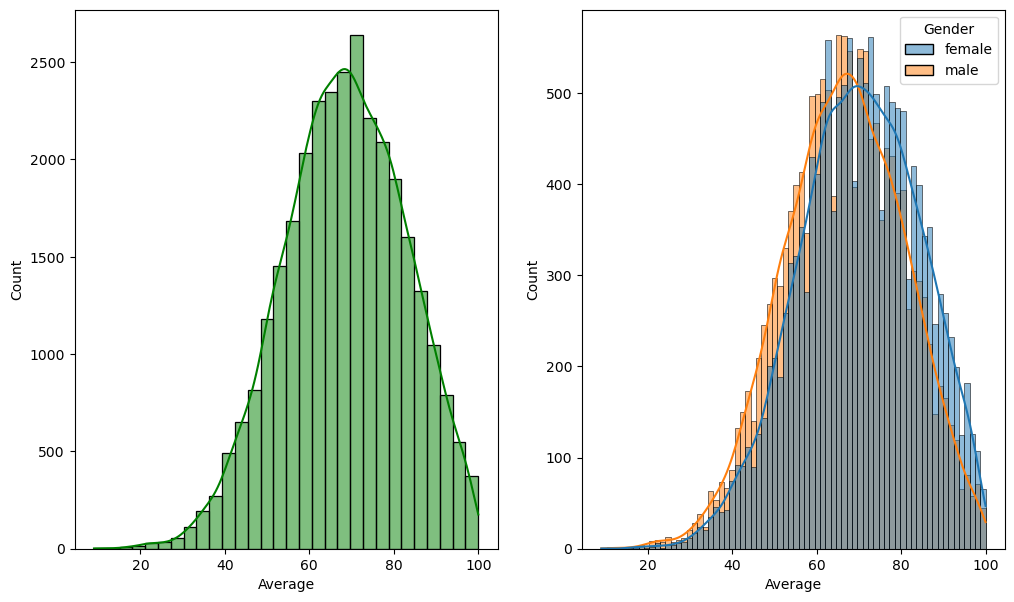

In [20]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.histplot(data=df,x="Average",bins=30,kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x="Average",kde=True,hue="Gender")

<Axes: xlabel='Total Score', ylabel='Count'>

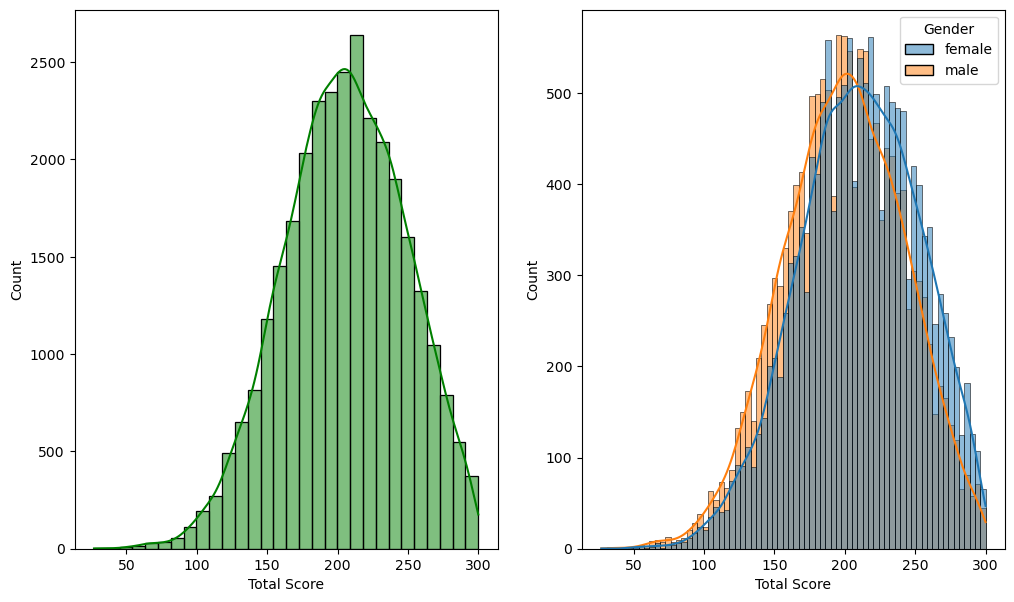

In [21]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.histplot(data=df,x="Total Score",bins=30,kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x="Total Score",kde=True,hue="Gender")

Male students perform better than female students

<Axes: xlabel='Average', ylabel='Count'>

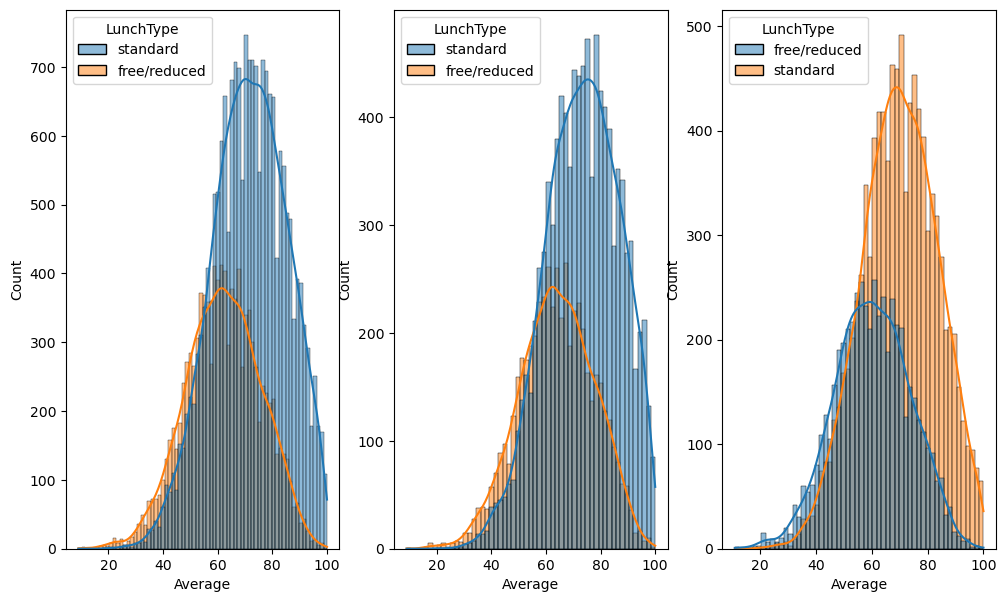

In [22]:
plt.figure(figsize=(12,7))

plt.subplot(1,3,1)
sns.histplot(data=df,x="Average",kde=True,hue="LunchType")

plt.subplot(1,3,2)
sns.histplot(data=df[df["Gender"]=="female"],x="Average",kde=True,hue="LunchType")

plt.subplot(1,3,3)
sns.histplot(data=df[df["Gender"]=="male"],x="Average",kde=True,hue="LunchType")

INSIGHTS

 ....standard lunch helps perform better in the exams and secure good average scores
.....standard lunch helps perform well in exam be it a male or female

<Axes: xlabel='Average', ylabel='Count'>

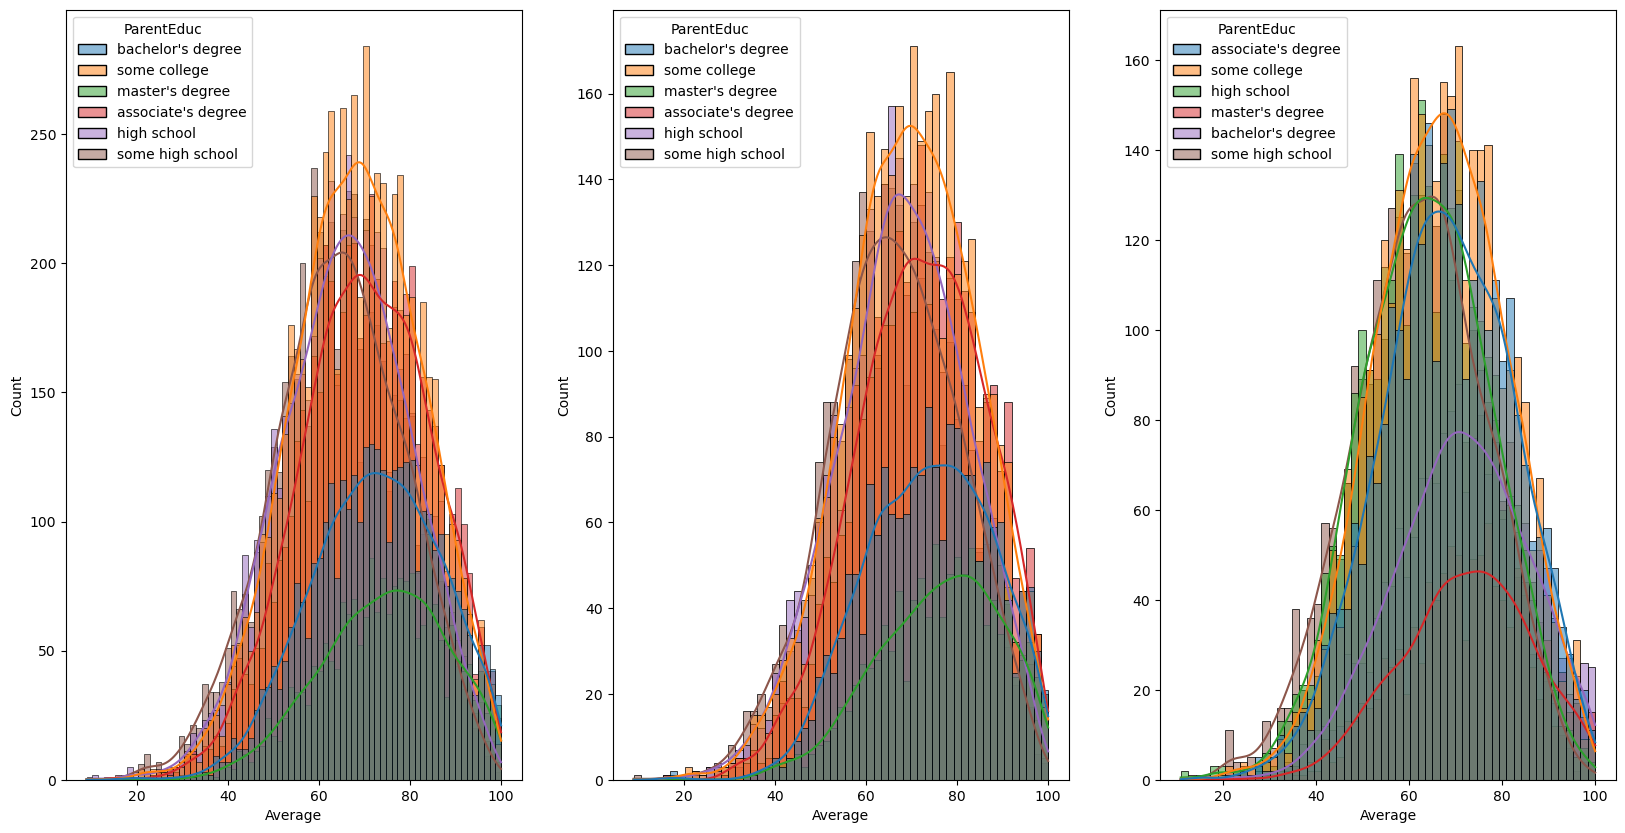

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.histplot(data=df,x="Average",kde=True,hue="ParentEduc")

plt.subplot(1,3,2)
sns.histplot(data=df[df["Gender"]=="female"],x="Average",kde=True,hue="ParentEduc")

plt.subplot(1,3,3)
sns.histplot(data=df[df["Gender"]=="male"],x="Average",kde=True,hue="ParentEduc")

In [24]:
df[21448:21450]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,Total Score,Average
21448,male,group C,bachelor's degree,standard,none,62,62,58,182,60.666667
21449,female,group D,some college,free/reduced,none,63,65,66,194,64.666667
